# The Lending Club Dataset
***Happy Money Data Science Assessment***

## Tasks and Objective:
- **Task A: KPI Reporting**
    - Objective A.1. Determine monthly loan volume & monthly average loan size in USD.
    - Objective A.2. Determine the charge-off rates by loan grade.
    - Objective A.3. Identify any statistically significant difference in loan charge off rates.
    - Objective A.4. Determine if the interest rate charged by the Lending Club is consistent with the risk level?


- **Task B: Loan Charge-Off Modeling**
    - Objective B.1. Perform the necessary data curation, specifically with respect to (a) missing and (b) erroneous values
    - Objective B.2. Build a *Charge-Off prediction model*, demonstrate important steps and discuss key features.


- **Task C: Discussing Fundamentals**
    - Objective C. Briefly explain *Logistic Regression* to a (a) techincal and (b) lay audience.

## Disclaimer: 
 - All the data for this problem was provided by Happy Money [G-Drive](https://drive.google.com/drive/folders/1pf8P-omhEL7VZDI-LJMHP7h0aNuVRM71). 
 - This work was done by *Amir A. Taghavey* as an assignment prior to the full interview with **Happy Money**.

In [39]:
# importing necessary libraries
import numpy as np
import pandas as pd
import re
from datetime import datetime, date
from IPython import display
import dill

In [89]:
# Loading the Lending Club dataset
fname = 'LoanStats_2015_subset.csv'
with open(fname, 'r') as f:
    df = pd.read_csv(f, low_memory=False)

## Exploratory Analysis

In [92]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 105 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    acc_now_delinq                       float64
 1    acc_open_past_24mths                 float64
 2    addr_state                           object 
 3    all_util                             float64
 4    annual_inc                           float64
 5    annual_inc_joint                     float64
 6    application_type                     object 
 7    avg_cur_bal                          float64
 8    bc_open_to_buy                       float64
 9    bc_util                              float64
 10   chargeoff_within_12_mths             float64
 11   collections_12_mths_ex_med           float64
 12   delinq_2yrs                          float64
 13   delinq_amnt                          float64
 14   desc                                 object 
 15   dti            

In [93]:
df.iloc[:,:94].describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,...,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_rev_hi_lim
count,421095.000000,421095.00000,21372.000000,4.210950e+05,511.000000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,...,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05,21372.000000,421095.000000,21372.000000,4.210950e+05,4.210950e+05
mean,0.006087,4.66500,60.881995,7.696561e+04,109981.011585,13104.784721,9636.063992,62.228136,0.010420,0.020240,...,0.064556,1.400755e+05,1.734070e+05,25.493468,5.222199e+04,36552.811389,21958.208958,1.537058,4.347865e+04,3.365771e+04
std,0.086482,3.19538,20.013842,7.394996e+04,52730.379847,15671.803897,14774.166134,27.576378,0.117019,0.157506,...,0.444231,1.552696e+05,1.756722e+05,12.097200,4.907494e+04,43103.833619,21840.371112,2.723339,4.394271e+04,3.766404e+04
min,0.000000,0.00000,0.000000,0.000000e+00,17950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,2.500000e+03,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,2.00000,48.000000,4.600000e+04,76032.500000,3199.000000,1345.000000,41.500000,0.000000,0.000000,...,0.000000,3.103900e+04,5.090900e+04,17.000000,2.259850e+04,10251.500000,7800.000000,0.000000,1.548150e+04,1.440000e+04
50%,0.000000,4.00000,62.000000,6.500000e+04,101771.000000,7262.000000,4366.000000,65.800000,0.000000,0.000000,...,0.000000,7.972900e+04,1.114050e+05,24.000000,3.959600e+04,24684.500000,15200.000000,0.000000,3.297000e+04,2.460000e+04
75%,0.000000,6.00000,75.000000,9.169050e+04,132800.000000,17974.500000,11574.000000,86.500000,0.000000,0.000000,...,0.000000,2.074750e+05,2.496290e+05,32.000000,6.565100e+04,47858.000000,28600.000000,2.000000,5.829900e+04,4.168850e+04
max,14.000000,64.00000,151.000000,9.500000e+06,500000.000000,555925.000000,559912.000000,318.200000,10.000000,14.000000,...,85.000000,4.447397e+06,9.999999e+06,169.000000,2.921551e+06,878459.000000,834300.000000,35.000000,2.101913e+06,9.999999e+06


In [94]:
df.dtypes

acc_now_delinq                         float64
acc_open_past_24mths                   float64
addr_state                              object
all_util                               float64
annual_inc                             float64
                                        ...   
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
Length: 105, dtype: object

In [95]:
df.shape

(421097, 105)

In [96]:
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.issue_d.unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', nan], dtype=object)

In [98]:
df.funded_amnt.sum()/df.funded_amnt_inv.sum(), df.funded_amnt.sum()/df.loan_amnt.sum()

(1.0004023482388524, 1.0)

In [99]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period', 'Default', nan],
      dtype=object)

In [100]:
df.loan_status.isna().mean(), df.issue_d.isna().mean()

(4.7494995214879235e-06, 4.7494995214879235e-06)

In [101]:
df.dropna(subset=['issue_d'], inplace=True)

In [102]:
# this func converts date strings to datetime objects. This would allow dates to be sorted in a meaningful way.
conv_to_date = lambda dt_str: datetime.strptime(dt_str, r'%b-%Y')

#this func converts 'num%' string to ffraction of type float
conv_to_frac = lambda percent_str: float(str(percent_str).split('%')[0])/100.0

In [103]:
conv_to_date('Apr-2010')

datetime.datetime(2010, 4, 1, 0, 0)

In [104]:
conv_to_frac('3.12%')

0.031200000000000002

In [105]:
df['issue_date'] = df.issue_d.apply(conv_to_date)
df['int_rate_frac'] = df.int_rate.apply(conv_to_frac)


**Objective A.1.** Determine monthly loan volume & monthly average loan size in USD.

In [106]:
loan_by_month = pd.concat([df.groupby('issue_date')[['loan_amnt']].sum(), df.groupby('issue_date')[['loan_amnt']].mean()], axis=1).sort_index()
loan_by_month.columns = ['monthly_vol_usd', 'monthly_mean_usd']
loan_by_month

,monthly_vol_usd,monthly_mean_usd
issue_date,,
2015-01-01,533132575.0,15185.933717
2015-02-01,366908525.0,15435.781447
2015-03-01,390003275.0,15354.459646
2015-04-01,539401075.0,15225.705676
2015-05-01,483189475.0,15140.835240
2015-06-01,429777175.0,15087.841847
2015-07-01,696238600.0,15148.135416
2015-08-01,555331400.0,15474.875996
2015-09-01,450246800.0,15720.358926


<AxesSubplot:xlabel='issue_date'>

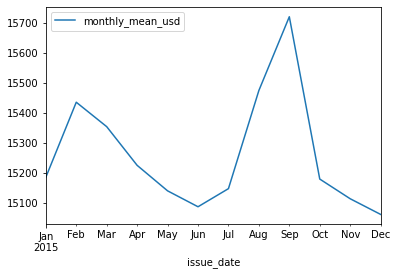

In [107]:
loan_by_month[['monthly_mean_usd']].plot()

<AxesSubplot:xlabel='issue_date'>

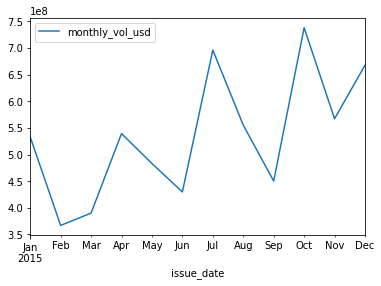

In [108]:
loan_by_month[['monthly_vol_usd']].plot()


**Objective A.2.** Determine the charge-off rates by loan grade.

In [109]:
df.grade.unique()

array(['B', 'A', 'D', 'E', 'C', 'F', 'G'], dtype=object)

In [110]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (16-30 days)',
       'Late (31-120 days)', 'In Grace Period', 'Default'], dtype=object)

In [111]:
is_default = lambda status: int(status in ['Charged Off', 'Default'])
is_current = lambda status: int(status in ['Fully Paid', 'Current'])

In [112]:
is_default('test')

0

In [113]:
df['default'] = df.loan_status.apply(is_default)

In [114]:
df['current'] = df.loan_status.apply(is_current)

In [115]:
#average defualt over all grades
mu_default, mu_current = df.default.mean(), df.current.mean()
mu_default, mu_current

(0.15163799142711265, 0.8276683408731996)

In [116]:
df.int_rate_frac.mean()

0.1259969731295788

In [117]:
default_rates_by_grade = df.groupby('grade').mean()[['default', 'current', 'int_rate_frac']]
default_rates_by_grade.columns = ['default_rate', 'current_rate', 'mean_int_rate']
default_rates_by_grade

,default_rate,current_rate,mean_int_rate
grade,,,
A,0.045053,0.947079,0.069416
B,0.097529,0.887115,0.100443
C,0.162217,0.813440,0.132983
D,0.235165,0.736505,0.167245
E,0.290832,0.674144,0.192904
F,0.375980,0.589895,0.236147
G,0.430549,0.540840,0.268352


<AxesSubplot:xlabel='grade'>

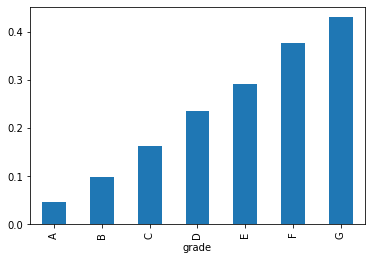

In [118]:
default_rates_by_grade.default_rate.plot(kind='bar')

<AxesSubplot:title={'center':'int_rate_frac'}, xlabel='grade'>

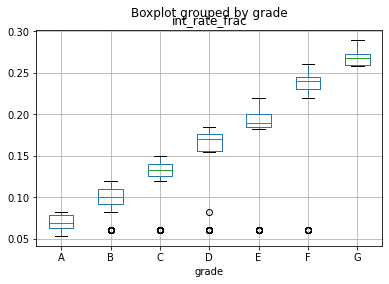

In [119]:
df.boxplot('int_rate_frac', by='grade')

**Objective A.3.** Identify any statistically significant difference in loan charge off rates.

In [120]:
# we will need to perform an ANOVA F-test to determine if grade-specific default-rate differences are statistically different. 
## Note: Given the large sample size and large range of variation of default rates across loan grades, a significant different is intuitively evident!

In [121]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [122]:
model = ols('default ~ grade', data=df).fit()

In [123]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
grade,6.0,2967.835993,494.639332,4067.823532,0.0
Residual,421088.0,51203.471702,0.121598,NaN,NaN


The above p-value suggests that it in near impossible that true grade-specific default rates are the same. 

''

**Objective A.4.** Determine if the interest rate chrged by the Lending Club is consistent with the risk level?

['Historical average fixed 30-yr mortgage rates'](http://cdn.gobankingrates.com/wp-content/uploads/2014/12/gobankingrates_mortgage_rate2.jpg)

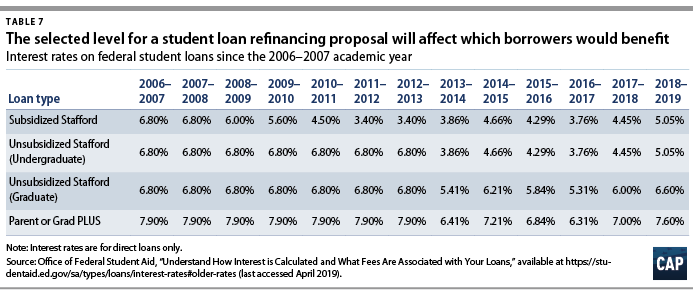

In [124]:
display.Image('https://cdn.americanprogress.org/content/uploads/2019/06/11063626/MillerEvaluatingOptions-WEBTABLES7.png')

Let's define a simple KPI as ratio of the interest rate charged to the risk of default (I2R) as:

$ I2R = \frac{i - i_{base}}{i_{ref} - i_{base}} \times \frac{risk_{ref}}{risk_{default}} $

where $ i $ denotes interst rate, and $ i_{ref} $ and $ risk_{ref} $ are the mean interest rate charged and mean default rate for **Grade A** loans, respectively.

In [125]:
risk_ref, i_ref, i_base = default_rates_by_grade.default_rate[0], default_rates_by_grade.mean_int_rate[0], df.int_rate_frac.min()
risk_ref, i_ref, i_base

(0.04505290716701211, 0.06941616941202032, 0.053200000000000004)

In [126]:
default_rates_by_grade['I2R'] = ((default_rates_by_grade.mean_int_rate)/default_rates_by_grade.default_rate)*(risk_ref/i_ref)
default_rates_by_grade

,default_rate,current_rate,mean_int_rate,I2R
grade,,,,
A,0.045053,0.947079,0.069416,1.000000
B,0.097529,0.887115,0.100443,0.668418
C,0.162217,0.813440,0.132983,0.532061
D,0.235165,0.736505,0.167245,0.461575
E,0.290832,0.674144,0.192904,0.430489
F,0.375980,0.589895,0.236147,0.407643
G,0.430549,0.540840,0.268352,0.404524


<AxesSubplot:xlabel='grade'>

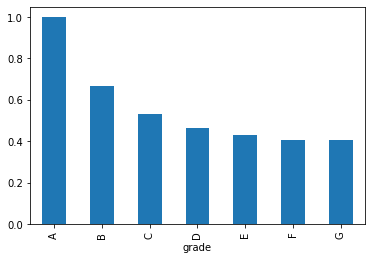

In [127]:
default_rates_by_grade.I2R.plot(kind='bar')

In [128]:
# the modified I2R metric that incorporates a base rate when default risk is minimal
default_rates_by_grade['I2R'] = ((default_rates_by_grade.mean_int_rate-i_base)/default_rates_by_grade.default_rate)*(risk_ref/(i_ref-i_base))
default_rates_by_grade

,default_rate,current_rate,mean_int_rate,I2R
grade,,,,
A,0.045053,0.947079,0.069416,1.000000
B,0.097529,0.887115,0.100443,1.345794
C,0.162217,0.813440,0.132983,1.366432
D,0.235165,0.736505,0.167245,1.347342
E,0.290832,0.674144,0.192904,1.334571
F,0.375980,0.589895,0.236147,1.351870
G,0.430549,0.540840,0.268352,1.388344


<AxesSubplot:xlabel='grade'>

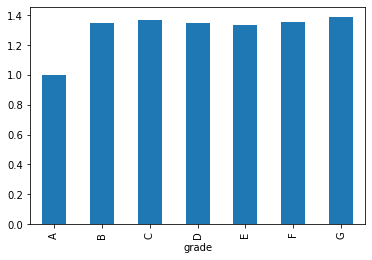

In [129]:
default_rates_by_grade.I2R.plot(kind='bar')

- **Task B: Modeling**
    - Objective B.1. Perform the necessary data curation, specifically with respect to (a) missing and (b) erronous values
    - Objective B.2. Build a Charge-Off prediction model, demonstrate important steps and discuss key features.


In [90]:
# Identifying features with largest NaN fractions
percent_nans_by_feature = df.isna().mean().sort_values(ascending=False)
percent_nans_by_feature[:50]

sec_app_mths_since_last_major_derog    1.000000
sec_app_revol_util                     1.000000
revol_bal_joint                        1.000000
member_id                              1.000000
sec_app_earliest_cr_line               1.000000
sec_app_mort_acc                       1.000000
sec_app_open_acc                       1.000000
sec_app_inq_last_6mths                 1.000000
sec_app_chargeoff_within_12_mths       1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_collections_12_mths_ex_med     1.000000
id                                     0.999995
desc                                   0.999893
dti_joint                              0.998791
annual_inc_joint                       0.998787
il_util                                0.955789
mths_since_rcnt_il                     0.950581
max_bal_bc                             0.949247
total_bal_il                           0.949247
open_il_12m                            0

In [300]:
# Let's drop all features with more than more than 95% NaN-values:
ml_features = percent_nans_by_feature[percent_nans_by_feature<0.05].index
ml_features.shape

(71,)

In [301]:
df_ml = df[ml_features].copy()
df_ml.drop(columns=['current', 'issue_d', 'zip_code', 'int_rate', 'loan_status'], inplace=True)
df_ml.shape

(421095, 66)

In [302]:
df_ml.num_tl_120dpd_2m.fillna(0, inplace=True)

In [303]:
df_ml.revol_util = df_ml.revol_util.apply(conv_to_frac)

In [304]:
df_ml.isna().mean().sort_values(ascending=False)[:20]

mo_sin_old_il_acct            0.029100
percent_bc_gt_75              0.010067
bc_util                       0.010038
bc_open_to_buy                0.009411
mths_since_recent_bc          0.009019
revol_util                    0.000385
title                         0.000313
dti                           0.000005
num_rev_accts                 0.000002
application_type              0.000000
acc_open_past_24mths          0.000000
num_tl_op_past_12m            0.000000
loan_amnt                     0.000000
addr_state                    0.000000
annual_inc                    0.000000
collections_12_mths_ex_med    0.000000
avg_cur_bal                   0.000000
chargeoff_within_12_mths      0.000000
num_tl_30dpd                  0.000000
delinq_2yrs                   0.000000
dtype: float64

In [305]:
df_ml['earliest_cr_line_date'] = df.earliest_cr_line.apply(conv_to_date)

In [306]:
df_ml['deltat_cr'] = (df_ml.issue_date - df_ml.earliest_cr_line_date).apply(lambda x: x.days)

In [307]:
df_ml.drop(columns=['earliest_cr_line', 'earliest_cr_line_date', 'issue_date'], inplace=True)

In [308]:
dtypes = df_ml.dtypes
numeric_columns = dtypes[dtypes.isin(['float64', 'int64'])].index
text_columns = df_ml.columns[~df_ml.columns.isin(numeric_columns)]
numeric_columns, text_columns

(Index(['mo_sin_old_il_acct', 'percent_bc_gt_75', 'bc_util', 'bc_open_to_buy',
        'mths_since_recent_bc', 'revol_util', 'dti', 'num_rev_accts', 'pub_rec',
        'policy_code', 'pct_tl_nvr_dlq', 'revol_bal', 'pub_rec_bankruptcies',
        'acc_now_delinq', 'tax_liens', 'tot_cur_bal', 'tot_hi_cred_lim',
        'total_acc', 'total_bal_ex_mort', 'total_il_high_credit_limit',
        'total_rev_hi_lim', 'default', 'total_bc_limit', 'num_bc_tl',
        'open_acc', 'installment', 'inq_last_6mths', 'funded_amnt_inv',
        'funded_amnt', 'delinq_amnt', 'delinq_2yrs',
        'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'avg_cur_bal',
        'annual_inc', 'loan_amnt', 'num_tl_op_past_12m', 'acc_open_past_24mths',
        'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats',
        'num_rev_tl_bal_gt_0', 'num_op_rev_tl', 'num_il_tl', 'num_bc_sats',
        'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd',
        'mort_acc', 'mo_sin_rcnt_tl'

In [222]:
#imputing the remaining missing values using sklearn KNN imputer
from sklearn.impute import KNNImputer

In [309]:
%%time
cols, inds = df_ml[numeric_columns].columns, df_ml[numeric_columns].index
arr_ml = KNNImputer().fit_transform(df_ml[numeric_columns])
df_ml[numeric_columns] = pd.DataFrame(arr_ml, index=inds)

Wall time: 15min 46s


In [310]:
df_ml.head()

,mo_sin_old_il_acct,percent_bc_gt_75,bc_util,bc_open_to_buy,mths_since_recent_bc,revol_util,title,dti,num_rev_accts,purpose,...,num_bc_sats,num_actv_rev_tl,num_actv_bc_tl,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,int_rate_frac,deltat_cr
0,127.0,0.0,17.1,41055.0,4.0,0.134,Debt consolidation,23.84,22.0,debt_consolidation,...,5.0,4.0,2.0,0.0,2.0,1.0,4.0,145.0,0.0980,4413.0
1,166.0,0.0,44.0,24661.0,73.0,0.425,Credit card refinancing,9.54,7.0,credit_card,...,3.0,1.0,1.0,0.0,7.0,4.0,4.0,238.0,0.0532,7243.0
2,143.0,50.0,59.9,23476.0,10.0,0.519,Debt consolidation,31.88,34.0,debt_consolidation,...,14.0,20.0,14.0,0.0,2.0,4.0,4.0,158.0,0.1849,4809.0
3,118.0,33.3,50.3,21569.0,16.0,0.503,Home improvement,18.50,11.0,home_improvement,...,3.0,2.0,2.0,0.0,3.0,6.0,16.0,220.0,0.1577,6696.0
4,112.0,100.0,102.4,0.0,25.0,1.024,NaN,17.56,4.0,credit_card,...,3.0,3.0,3.0,0.0,0.0,13.0,25.0,114.0,0.1989,3470.0


In [311]:
df_ml.dropna(inplace=True)
df_ml.shape

(420963, 65)

In [312]:
with open ('df-ml-imputed.pkd', 'wb') as f:
    dill.dump(df_ml, f)

In [314]:
df.initial_list_status.unique(), df.purpose.unique(), df.sub_grade.unique(),  df.term.unique(),  df.title.unique(), df.verification_status.unique(), df.application_type.unique(), 

(array(['w', 'f'], dtype=object),
 array(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
        'car', 'small_business', 'major_purchase', 'vacation', 'house',
        'medical', 'moving', 'renewable_energy', 'wedding', 'educational'],
       dtype=object),
 array(['B3', 'A1', 'D5', 'D1', 'E3', 'B4', 'D2', 'A4', 'C4', 'C2', 'A2',
        'D3', 'C1', 'C5', 'C3', 'B2', 'E2', 'E4', 'A5', 'F3', 'F2', 'D4',
        'B1', 'B5', 'F1', 'E5', 'A3', 'F5', 'E1', 'G2', 'G1', 'G3', 'G4',
        'F4', 'G5'], dtype=object),
 array([' 60 months', ' 36 months'], dtype=object),
 array(['Debt consolidation', 'Credit card refinancing',
        'Home improvement', nan, 'Other', 'Car financing', 'Business',
        'Major purchase', 'Vacation', 'Home buying', 'Medical expenses',
        'Moving and relocation', 'Green loan', 'odymeds', 'SAVE',
        'Learning and training', 'new day',
        'Trying to come back to reality!', 'considerate',
        'Paying off higher interest cards &

<AxesSubplot:xlabel='emp_length'>

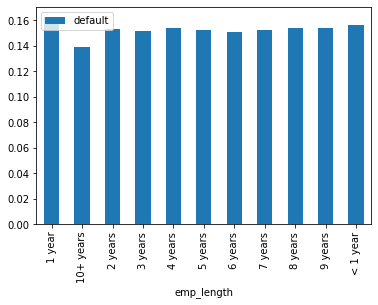

In [317]:
df.groupby('emp_length').mean()[['default']].plot(kind='bar')

### Building the charge_off model

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [2]:
import dill
with open('df-ml-imputed.pkd', 'rb') as f:
    df_ml = dill.load(f)

In [5]:
# Null-model accuracy:
1-df_ml.default.mean()

0.8483429660088891

In [6]:
# only one 'educational' value in this column - resolution: drop row
drop_row_idx = df_ml.purpose[df_ml.purpose=='educational'].index
df_ml.drop(index=drop_row_idx, inplace=True)

In [84]:
X, y = df_ml.drop(columns=['default', 'title']), df_ml.default.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=81)

In [85]:
dtypes = X.dtypes
numeric_columns = dtypes[dtypes.isin(['float64', 'int64'])].index
text_columns = X.columns[~X.columns.isin(numeric_columns)]
numeric_columns, text_columns

(Index(['mo_sin_old_il_acct', 'percent_bc_gt_75', 'bc_util', 'bc_open_to_buy',
        'mths_since_recent_bc', 'revol_util', 'dti', 'num_rev_accts', 'pub_rec',
        'policy_code', 'pct_tl_nvr_dlq', 'revol_bal', 'pub_rec_bankruptcies',
        'acc_now_delinq', 'tax_liens', 'tot_cur_bal', 'tot_hi_cred_lim',
        'total_acc', 'total_bal_ex_mort', 'total_il_high_credit_limit',
        'total_rev_hi_lim', 'total_bc_limit', 'num_bc_tl', 'open_acc',
        'installment', 'inq_last_6mths', 'funded_amnt_inv', 'funded_amnt',
        'delinq_amnt', 'delinq_2yrs', 'collections_12_mths_ex_med',
        'chargeoff_within_12_mths', 'avg_cur_bal', 'annual_inc', 'loan_amnt',
        'num_tl_op_past_12m', 'acc_open_past_24mths', 'num_tl_90g_dpd_24m',
        'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0',
        'num_op_rev_tl', 'num_il_tl', 'num_bc_sats', 'num_actv_rev_tl',
        'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mort_acc', 'mo_sin_rcnt_tl',
        'mo_sin_r

Prelim comparison of several classifiers for predicting loan default:

In [86]:
col_trans = make_column_transformer(
                    (OneHotEncoder(), text_columns),
                    (StandardScaler(), numeric_columns),
                    remainder='drop'    
                                    )

In [10]:
models_dict = {'logreg': LogisticRegressionCV(n_jobs=-2, multi_class='ovr', random_state=81),
               'rccv': RidgeClassifierCV(),
               'dtc': DecisionTreeClassifier(min_samples_split=10, random_state=81),
               'rfc': RandomForestClassifier(min_samples_split=10, max_depth=5, max_features='sqrt', n_jobs=-2, random_state=81, warm_start=True),
               'gbc': GradientBoostingClassifier(min_samples_split=10, max_depth=10, random_state=81, warm_start=True),
               'knnc': KNeighborsClassifier(n_neighbors=50, weights='distance',n_jobs=-2),
               'svc': LinearSVC(dual=False, C=0.5, class_weight='balanced', random_state=81, max_iter=100),
               'mlpc': MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=100, random_state=81, warm_start=True, early_stopping=True)
              }

In [11]:
%%time
for model_id, model in models_dict.items():
    pipe = Pipeline([
                            ('col_tr', col_trans),
                            #('tr_svd', TruncatedSVD(n_components=15)),
                            ('pca', PCA(n_components=0.95)),
                            (model_id, model)
    ])
    
    mean_cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc').mean()
    pipe.fit(X_train, y_train)
    acc = accuracy_score(y_test, pipe.predict(X_test))
    print(f'model <<{model_id}>> mean roc_auc on training data: {mean_cv_score} - prediction accuracy on test data: {acc}')

model <<logreg>> mean roc_auc on training data: 0.7060713512255783 - prediction accuracy on test data: 0.8466545252989152
model <<rccv>> mean roc_auc on training data: 0.7054832547690391 - prediction accuracy on test data: 0.8465595058991211
model <<dtc>> mean roc_auc on training data: 0.5445491909634825 - prediction accuracy on test data: 0.7546282365983055
model <<rfc>> mean roc_auc on training data: 0.6891966930748149 - prediction accuracy on test data: 0.8465595058991211
model <<gbc>> mean roc_auc on training data: 0.6980764952658569 - prediction accuracy on test data: 0.8457360044342387
model <<knnc>> mean roc_auc on training data: 0.6810502443028205 - prediction accuracy on test data: 0.8465753424657534
model <<svc>> mean roc_auc on training data: 0.7066513416641879 - prediction accuracy on test data: 0.6349988122575025
model <<mlpc>> mean roc_auc on training data: 0.7088953373399165 - prediction accuracy on test data: 0.8467970543986064
Wall time: 7h 18min 33s


In [49]:
%%time

pipe_lr = Pipeline([
                        ('col_tr', col_trans),
                        #('tr_svd', TruncatedSVD(n_components=30)),
                        ('pca', PCA(n_components=0.99)),
                        ('lr', LogisticRegressionCV(n_jobs=-2, multi_class='ovr', random_state=81))
])

cross_val_score(pipe_lr, X_train, y_train, cv=5, scoring='roc_auc').mean()

Wall time: 42.5 s


0.7043437235582395

In [50]:
pipe_lr.fit(X_train, y_train)
accuracy_score(y_test, pipe_lr.predict(X_test)), precision_score(y_test, pipe_lr.predict(X_test)), recall_score(y_test, pipe_lr.predict(X_test)), confusion_matrix(y_test, pipe_lr.predict(X_test))

(0.8467495446987093,
 0.5263157894736842,
 0.012385179069047373,
 array([[53348,   108],
        [ 9569,   120]], dtype=int64))

In [51]:
confusion_matrix(y_test, pipe_lr.predict(X_test)), confusion_matrix(y_train, pipe_lr.predict(X_train))

(array([[53348,   108],
        [ 9569,   120]], dtype=int64),
 array([[303005,    659],
        [ 53542,    611]], dtype=int64))

In [345]:
%%time

pipe_rccv = Pipeline([
                        ('col_tr', col_trans),
                        ('tr_svd', TruncatedSVD(n_components=15)),
                        ('rccv', RidgeClassifierCV())
])

cross_val_score(pipe_rccv, X_train, y_train, cv=5, scoring='roc_auc').mean()

Wall time: 21.3 s


0.6971120979539964

In [52]:
%%time

pipe_dtc = Pipeline([
                        ('col_tr', col_trans),
                        ('dtc', DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=81))
])

# cross_val_score(pipe_dtc, X_train, y_train, cv=5, scoring='roc_auc').mean()
pipe_dtc.fit(X_train, y_train)
y_pred = pipe_dtc.predict(X_test)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

Wall time: 20.4 s


(0.7568928656267321,
 0.21519114688128774,
 0.22076581690576944,
 array([[45655,  7801],
        [ 7550,  2139]], dtype=int64))

In [87]:
%%time

pipe_mlpc = Pipeline([
                        ('col_tr', col_trans),
                        ('dtc', MLPClassifier(hidden_layer_sizes=(1000, 500, 100, 10), max_iter=500, random_state=81, warm_start=True, early_stopping=True))
])

# cross_val_score(pipe_dtc, X_train, y_train, cv=5, scoring='roc_auc').mean()
pipe_mlpc.fit(X_train, y_train)
y_pred = pipe_mlpc.predict(X_test)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

Wall time: 21min 25s


(0.846781217831974,
 0.512962962962963,
 0.028589121684384353,
 array([[53193,   263],
        [ 9412,   277]], dtype=int64))

In [53]:
feat_importances = pipe_dtc.steps[-1][1].feature_importances_

In [57]:
#finding the most important features
s_feat_imps = pd.Series(feat_importances)
top_feats_inds = s_feat_imps.sort_values(ascending=False).index
top_feats_inds

Int64Index([52,  6,  0, 32,  5, 16, 33, 51, 53, 11,  3,  2,  4, 20, 24, 21, 19,
            18, 15, 17,  7, 50, 43, 10, 49, 22, 36,  1, 42, 44, 26, 48, 46, 27,
            45, 35, 41, 40, 34, 23, 25, 47, 29,  8, 12, 37, 14, 30, 31, 28, 13,
            38, 39,  9],
           dtype='int64')

In [63]:
for idx, imp in s_feat_imps.sort_values(ascending=False).iteritems():
    print(f'index-{idx}, importance: {imp:.3f} - feature: {numeric_columns[idx]}')

index-52, importance: 0.085 - feature: int_rate_frac
index-6, importance: 0.044 - feature: dti
index-0, importance: 0.038 - feature: mo_sin_old_il_acct
index-32, importance: 0.038 - feature: avg_cur_bal
index-5, importance: 0.036 - feature: revol_util
index-16, importance: 0.036 - feature: tot_hi_cred_lim
index-33, importance: 0.035 - feature: annual_inc
index-51, importance: 0.034 - feature: mo_sin_old_rev_tl_op
index-53, importance: 0.033 - feature: deltat_cr
index-11, importance: 0.033 - feature: revol_bal
index-3, importance: 0.031 - feature: bc_open_to_buy
index-2, importance: 0.030 - feature: bc_util
index-4, importance: 0.030 - feature: mths_since_recent_bc
index-20, importance: 0.030 - feature: total_rev_hi_lim
index-24, importance: 0.030 - feature: installment
index-21, importance: 0.029 - feature: total_bc_limit
index-19, importance: 0.029 - feature: total_il_high_credit_limit
index-18, importance: 0.027 - feature: total_bal_ex_mort
index-15, importance: 0.026 - feature: tot_

In [80]:
# building a logistic regression model using only the top 10 most important numeric features
X_30 = X[numeric_columns[top_feats_inds[:30]]]
X_30_train, X_30_test, y_train, y_test = train_test_split(X_30, y, test_size=0.15, random_state=81)

In [81]:
X_10.head()

,int_rate_frac,dti,mo_sin_old_il_acct,avg_cur_bal,revol_util,tot_hi_cred_lim,annual_inc,mo_sin_old_rev_tl_op,deltat_cr,revol_bal,...,num_rev_accts,mo_sin_rcnt_rev_tl_op,num_il_tl,pct_tl_nvr_dlq,mo_sin_rcnt_tl,num_bc_tl,acc_open_past_24mths,percent_bc_gt_75,num_op_rev_tl,num_bc_sats
0,0.0980,23.84,127.0,10086.0,0.134,291626.0,65000.0,145.0,4413.0,9786.0,...,22.0,4.0,13.0,100.0,1.0,10.0,8.0,0.0,11.0,5.0
1,0.0532,9.54,166.0,61551.0,0.425,512381.0,150000.0,238.0,7243.0,19339.0,...,7.0,4.0,4.0,100.0,4.0,3.0,1.0,0.0,4.0,3.0
2,0.1849,31.88,143.0,7176.0,0.519,267312.0,75000.0,158.0,4809.0,43413.0,...,34.0,4.0,9.0,100.0,4.0,18.0,8.0,50.0,24.0,14.0
3,0.1577,18.50,118.0,51015.0,0.503,447599.0,175000.0,220.0,6696.0,21831.0,...,11.0,16.0,9.0,95.7,6.0,7.0,7.0,33.3,4.0,3.0
5,0.1078,14.01,156.0,3068.0,0.518,92909.0,104000.0,181.0,5508.0,28475.0,...,23.0,8.0,7.0,96.8,8.0,12.0,1.0,33.3,13.0,6.0


In [82]:
%%time

pipe_lr_30 = Pipeline([
                        ('stdsc', StandardScaler()),
                        ('lr', LogisticRegressionCV(n_jobs=-2, multi_class='ovr', random_state=81))
])

cross_val_score(pipe_lr_30, X_30_train, y_train, cv=5, scoring='roc_auc').mean()

Wall time: 57.8 s


0.7033419742055352

In [83]:
pipe_lr_30.fit(X_30_train, y_train)
y_pred = pipe_lr_30.predict(X_30_test)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), confusion_matrix(y_test, y_pred)

(0.8466386887322829,
 0.5120772946859904,
 0.010940241510991846,
 array([[53355,   101],
        [ 9583,   106]], dtype=int64))